In [15]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [16]:
df = pd.read_csv('../data/waterQuality1.csv')
# https://www.kaggle.com/datasets/mssmartypants/water-quality/data

In [17]:
df = df.drop(df[df['ammonia'] == "#NUM!"].index)
df['ammonia'] = df['ammonia'].astype('float')
df['is_safe'] = df['is_safe'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

Use random under sampling for problem imbalance dataset.

In [19]:
df_majority = df[df.is_safe == 0]
df_minority = df[df.is_safe == 1]

In [20]:
from model_selection import random_under_sampling
df_majority_downsampled = random_under_sampling(df_majority, 1500, random_state=32)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled

Current Size: 7084
Delete Size Target: 5584


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
2,1.01,14.02,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
10,3.27,3.60,0.001,2.69,0.005,5.75,0.15,0.60,1.29,0.04,...,0.145,8.47,1.25,0.006,55.40,7.80,0.05,0.33,0.06,0.0
18,4.88,26.94,0.020,0.36,0.001,1.21,0.68,0.71,0.99,0.75,...,0.071,0.31,1.22,0.002,56.70,1.00,0.00,0.41,0.05,0.0
33,1.63,15.75,0.030,2.54,0.008,4.25,0.74,1.35,1.24,0.12,...,0.193,17.29,1.27,0.001,58.15,1.71,0.09,0.44,0.05,0.0
34,0.01,29.29,0.001,2.93,0.007,7.75,0.68,1.09,0.00,0.80,...,0.091,17.33,1.86,0.001,43.09,3.76,0.09,0.30,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.000,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7995,0.05,24.22,0.020,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7996,0.09,6.85,0.000,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7997,0.01,10.00,0.010,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


Split to x and y.

In [21]:
x = np.array(df_downsampled.drop(['is_safe'], axis=1))
y = np.array(df_downsampled['is_safe'].copy())

from model_selection import positive_negative_check
positive_negative_check(y)

Positive Class [1.0]: 912 sample.
Negative Class [0.0]: 1500 sample.
Total 2412 Samples.


Change negative and positive class from 0 , 1 to -1, 1.

In [22]:
y = np.where(y <= 0, -1, 1)
positive_negative_check(y)

Positive Class [1]: 912 sample.
Negative Class [-1]: 1500 sample.
Total 2412 Samples.


Split x and y to train, test and validation 

In [23]:
from model_selection import train_test_split

buff_x, x_test, buff_y, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train, x_validate, y_train, y_validate = train_test_split(buff_x,buff_y, test_size=0.3, random_state=13)
# x_train

In [24]:
# model = svm.SVC(kernel='linear' ,C=10)
# model.fit(x_train, y_train)

# model.score(x_validate, y_validate)
# y_pred = model.predict(x_test)
# print(y_pred)
# model.score(x_test, y_test)
    


# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# # print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
# # print("Recall:",metrics.f1_score(y_test, y_pred, average="macro"))
# # print(classification_report(y_test, y_pred))


SVM Classifier

In [25]:
from model import SVM
model2 = SVM(kernel='linear', learning_rate=0.001, max_itr=1800, debug=True, lambda_param=0.01, verbose=False)
model2.fit(x_train, y_train)

predict = model2.predict(x_test)
predict_validate = model2.predict(x_validate)

print("Validate Accuracy:",model2.score(x_validate, y_validate))

for i in range(len(predict)):
    print(predict[i], y_test[i])
print("Test Accuracy:",model2.score(x_test, y_test))

-- Parameter --
C: 1
Learning Rate: 0.001
Lambda Param: 0.01
N_Iters: 1800
---------------
Gradient 2431800 steps.
Validate Accuracy: 0.7892918825561313
-1.0 1
1.0 1
-1.0 1
1.0 1
1.0 1
-1.0 -1
-1.0 1
1.0 1
1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
1.0 -1
-1.0 -1
-1.0 -1
1.0 -1
1.0 1
1.0 -1
-1.0 -1
1.0 1
-1.0 1
1.0 1
1.0 1
-1.0 -1
-1.0 1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
1.0 -1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
1.0 -1
-1.0 -1
1.0 1
1.0 -1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 1
1.0 1
1.0 1
-1.0 -1
1.0 1
1.0 -1
-1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
-1.0 -1
1.0 1
-1.0 -1
1.0 1
1.0 1
-1.0 -1
-1.0 -1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 1
-1.0 -1
-1.0 

Epoch 1
Validate Accruacy is: 0.7098445595854922
Train Accuracy is: 0.695780903034789
Epoch 10
Validate Accruacy is: 0.7754749568221071
Train Accuracy is: 0.7638786084381939
Epoch 50
Validate Accruacy is: 0.7737478411053541
Train Accuracy is: 0.7668393782383419
Epoch 100
Validate Accruacy is: 0.7858376511226253
Train Accuracy is: 0.7831236121391562
Epoch 500
Validate Accruacy is: 0.7823834196891192
Train Accuracy is: 0.769059955588453
Epoch 700
Validate Accruacy is: 0.7737478411053541
Train Accuracy is: 0.7638786084381939
Epoch 1000
Validate Accruacy is: 0.7737478411053541
Train Accuracy is: 0.7668393782383419
Epoch 1500
Validate Accruacy is: 0.7823834196891192
Train Accuracy is: 0.7727609178386381
Epoch 1600
Validate Accruacy is: 0.7772020725388601
Train Accuracy is: 0.765358993338268
Epoch 1700
Validate Accruacy is: 0.7823834196891192
Train Accuracy is: 0.7727609178386381
Epoch 1800
Validate Accruacy is: 0.7892918825561313
Train Accuracy is: 0.7801628423390081
Epoch 1900
Validate Acc

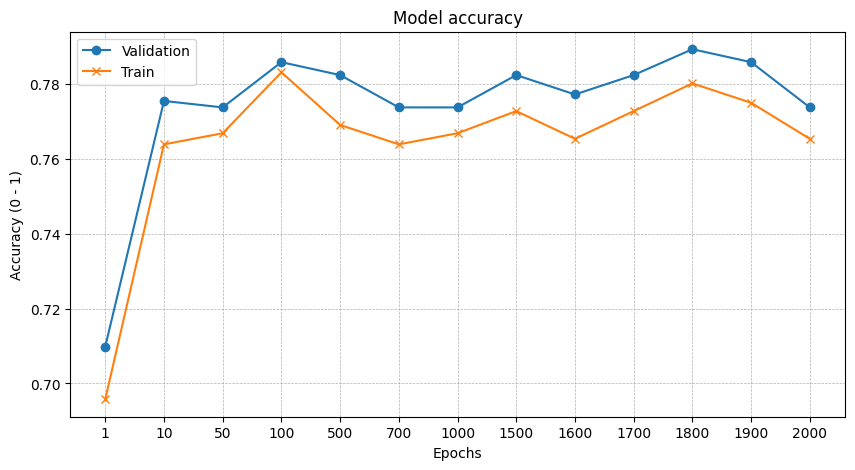

In [26]:
epoch = [1, 10 , 50 ,100 , 500, 700, 1000, 1500, 1600, 1700, 1800, 1900, 2000]
model2.plot_accuracy(x_train,y_train, x_validate, y_validate, epoch)